In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import nltk
from nltk.stem import PorterStemmer #for stemming
from nltk.tokenize import word_tokenize
import nltk.corpus

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import svm

In [2]:
import pandas as pd
k=pd.read_excel("fake_news_dataset.xlsx")

In [3]:
k.head(10)

,Actual_Post,Posted_date,Posted_page,No_of_like,No_of_follower,Page_created_on,is_verified,label
0,መንግስት ከህዝቡ ጋር እልህ ውስጥ ከሚገባ ለተጠየቀው ህጋዊ ጥያቄ ተገቢ ...,2020-08-10,ፌደራሊስት ሀይሎች,65084,65084,2019-02-02,No,Fake
1,በአመራ ሙሁራን እና በትግራይ ሙሁራን ብዙ የሚያከራክር ነጠብ መሃሪ ዮሐን...,2020-08-10,ፌደራሊስት ሀይሎች,65084,65084,2019-02-02,No,Fake
2,“የአብይ አህመድ የልቦናው መዋቅር ጤናማ ባልሆነ ደረጃ ላይ ያለ ነው፤ ከ...,2020-08-10,ፌደራሊስት ሀይሎች,65084,65084,2019-02-02,No,Fake
3,አሀዳዊው ጦር መብታቸው የጠየቁትን 10 የወላይታ ተወላጆችን መግደሉ አለም...,2020-08-10,ፌደራሊስት ሀይሎች,65084,65084,2019-02-02,No,Fake
4,ፍትህ ለወላይታ ፍትህ ለቅማንት ፍትህ ለኦሮሞ ፍትህ ለሶማሌ ፍትህ ለ...,2020-08-10,ፌደራሊስት ሀይሎች,65084,65084,2019-02-02,No,Fake
5,ፍትህ ያጣው ብሄር ! የአማራ ልዩ ሀይል በቅማንት ብሄረሰብ ላይ የሚፈፅመ...,2020-08-10,ፌደራሊስት ሀይሎች,65084,65084,2019-02-02,No,Fake
6,"""በቃ አመፀኞችንና አሸባርዎችን አስረናል ከዛሬ ጀምሮ የተረጋጋችና ሰላማዊ...",2020-08-10,ፌደራሊስት ሀይሎች,65084,65084,2019-02-02,No,Fake
7,እግዚአብሔር ይፈርዳል::ክርስቲያንና ኦቶና ሆስፒታል ዞሬ ሳይ የንፁሃን ወ...,2020-08-10,ፌደራሊስት ሀይሎች,65084,65084,2019-02-02,No,Fake
8,"""በትግራይ አዲሱ ታሪካዊው መንግስት ለመሰየም የምርጫ ቅስቀሳም ነገ ይጀመ...",2020-08-10,ፌደራሊስት ሀይሎች,65084,65084,2019-02-02,No,Fake
9,“በሀገር ላይ የሚቃጡ ጥቃቶችን ለመከላከል የተሟላ ዝግጅት ተደርጓል” - ...,2020-08-10,ፌደራሊስት ሀይሎች,65084,65084,2019-02-02,No,Fake


In [4]:
import nltk
import re

In [5]:
space_pattern = '\s+'
url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
englishword_num ='[a-zA-Z]|[0-9]+'
AmhPunc='[፤።፡፣:,.?/()•“”*፨]+'
special_char = "[፥@#$%^&=?×!,;:_.(){}`'+*<>\"¤—„\® ̄™¡¡\x10»€«·‘0e1b§”¬¦...""f÷\~ ̈©±¥£¶–°• ̃’“|]"
geez_number='[፩፪፫፬፭፮፯፰፱፲፳፴፵፶፷፸፹፺፻] ' # for removing geez number
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                 u"\U0001F1E0-\U0001F1FF"  # flags 
                                 u"\U00002702-\U000027B0"
                                 u"\U000024C2-\U0001F251"
                                 "]+", flags=re.UNICODE)
haa='[ሃ]'; he='[ሐ]'; hu='[ሑ]'; hi='[ሒ]'; ha='[ሓ]'; hie='[ሔ]'; h='[ሕ]'; ho='[ሖ]'; he1='[ኀ]'; hu1='[ኁ]'; hi1='[ኂ]'; ha1='[ኃ]'; hie1='[ኄ]'; h1='[ኅ]'; ho1='[ኆ]';
se='[ሠ]'; su='[ሡ]'; si='[ሢ]'; sa='[ሣ]'; sie='[ሤ]'; s='[ሥ]'; so='[ሦ]'; 
aa1='[ኣ]'; ae='[ዐ]'; au='[ዑ]'; ai='[ዒ]'; aa='[ዓ]'; aie='[ዔ]'; e='[ዕ]'; ao='[ዖ]';
tse='[ጸ]'; tsu='[ጹ]'; tsi='[ጺ]'; tsa='[ጻ]'; tsie='[ጼ]'; ts='[ጽ]'; tso='[ጾ]';

In [6]:
import nltk
corpus=[]
for i in range(0,len(k)):
    Clean_text = re.sub(url_regex,'', str(k['Actual_Post'][i]))
    Clean_text = re.sub(AmhPunc,' ',Clean_text)
    Clean_text=re.sub(special_char,' ',Clean_text)
    Clean_text= re.sub(englishword_num,'',Clean_text)
    Clean_text= re.sub(r'(.)\1+', r'\1\1',Clean_text) #removingelongation in text
    Clean_text = RE_EMOJI.sub(r'', Clean_text)
    Clean_text =re.sub(geez_number,'',Clean_text)
    Clean_text=re.sub('-','',Clean_text)
    Clean_text=re.sub(r'<[^>]*>','', Clean_text)
    Clean_text = Clean_text.replace("\\", "");
    Clean_text = Clean_text.replace("[", "");
    Clean_text = Clean_text.replace("]", "");
    Clean_text = emoji_pattern.sub(r'', Clean_text)
    Clean_text = re.sub(space_pattern,' ',Clean_text)
    ##################################################
    Clean_text= re.sub(he,'ሀ',Clean_text); 
    Clean_text= re.sub(hu,'ሁ',Clean_text);
    Clean_text= re.sub(hi,'ሂ',Clean_text);
    Clean_text= re.sub(ha,'ሀ',Clean_text); 
    Clean_text= re.sub(hie,'ሄ',Clean_text);
    Clean_text= re.sub(h,'ህ',Clean_text);
    Clean_text= re.sub(ho,'ሆ',Clean_text);
    Clean_text= re.sub(haa,'ሀ',Clean_text);
    #######################################################
    Clean_text= re.sub(he1,'ሀ',Clean_text) 
    Clean_text= re.sub(hu1,'ሁ',Clean_text) 
    Clean_text= re.sub(hi1,'ሂ',Clean_text)
    Clean_text= re.sub(ha1,'ሀ',Clean_text)
    Clean_text= re.sub(hie1,'ሄ',Clean_text)
    Clean_text= re.sub(h1,'ህ',Clean_text)
    Clean_text= re.sub(ho1,'ሆ',Clean_text)
    ##########################################################
    Clean_text= re.sub(se,'ሰ',Clean_text) 
    Clean_text= re.sub(su,'ሱ',Clean_text)
    Clean_text= re.sub(si,'ሲ',Clean_text)
    Clean_text= re.sub(sa,'ሳ',Clean_text)
    Clean_text= re.sub(sie,'ሴ',Clean_text) 
    Clean_text= re.sub(s,'ስ', Clean_text)
    Clean_text= re.sub(so,'ሶ',Clean_text)
    ###################################################
    Clean_text= re.sub(ae,'አ',Clean_text) 
    Clean_text= re.sub(au,'ኡ',Clean_text)
    Clean_text= re.sub(ai,'ኢ',Clean_text)
    Clean_text= re.sub(aa,'አ',Clean_text) 
    Clean_text= re.sub(aie,'ኤ',Clean_text)
    Clean_text= re.sub(e,'እ',Clean_text)
    Clean_text= re.sub(ao,'ኦ',Clean_text)
    Clean_text= re.sub(aa1,'አ',Clean_text)
    #############################################
    Clean_text= re.sub(tse,'ፀ',Clean_text) 
    Clean_text= re.sub(tsu,'ፁ',Clean_text) 
    Clean_text= re.sub(tsi,'ፂ',Clean_text)
    Clean_text= re.sub(tsa,'ፃ',Clean_text) 
    Clean_text= re.sub(tsie,'ፄ',Clean_text)
    Clean_text= re.sub(ts,'ፅ',Clean_text)
    Clean_text= re.sub(tso,'ፆ',Clean_text)
    Clean_text= Clean_text.split()
    Clean_text = ' '.join(Clean_text)
    corpus.append(Clean_text)

In [7]:
tokens=[]


from nltk.tokenize import word_tokenize


tokenized_sents = [word_tokenize(i) for i in corpus]
for i in tokenized_sents:
    #print(i)
    tokens.append(i)
    
tokens=[[word for word in article if len(word)>1]for article in tokens]

In [8]:
import re
stopword=[]
with open('stopworrrrd.txt','r' ,encoding='utf8') as f:
    f.readline()
    for i in f:
       
        stopword.append(re.sub('[\n]+', '',str(i)))

In [9]:
after_stopword_remove=[]
after_stopword_remove=[[word for word in article if word not in stopword]for article in tokens]
after_stopword_remove

[['መንግስት',
  'ከህዝቡ',
  'እልህ',
  'ከሚገባ',
  'ለተጠየቀው',
  'ህጋዊ',
  'ጥያቄ',
  'ተገቢ',
  'ምላሽ',
  'መስጠት',
  'ከዎላይታ',
  'ሶዶ',
  'ዩኒቨርሲቲ',
  'ፕረዚዳንት'],
 ['በአመራ',
  'ሙሁራን',
  'በትግራይ',
  'ሙሁራን',
  'የሚያከራክር',
  'ነጠብ',
  'መሀሪ',
  'ዮሀንስ',
  'ተናገረ',
  'የመለስ',
  'ዜናዊ',
  'አላማ',
  'የሚኒሊክ',
  'ስርአተ',
  'የሽዋ',
  'ስርአት',
  'ማስቀጠል',
  'ነብር',
  'አብይ',
  'እውነት',
  'መለስ',
  'የሚኒሊክ',
  'ስርአት',
  'ናፋቂ',
  'ነበር',
  'ነፍጠኛ',
  'ለምን',
  'መለስ',
  'ጠላት',
  'ያወግዘዋል',
  'አንድ',
  'እውነት',
  'በመለስ',
  'ግዜ',
  'ኢትዮጵያ',
  'ታላቅ'],
 ['የአብይ',
  'አህመድ',
  'የልቦናው',
  'መዋቅር',
  'ጤናማ',
  'ባልሆነ',
  'ደረጃ',
  'ከህዝብ',
  'የሚቀበላት',
  'ዝና',
  'ከሌለች',
  'የሚሞት',
  'የቀድሞ',
  'የኢንሳ',
  'ምክትል',
  'ሀላፊ',
  'ቢንያም',
  'ተወልደ',
  'ከአውሎ',
  'ሚድያ',
  'ባደረጉት',
  'ቆይታ',
  'የተናገሩት፦',
  'ያጋጠመው',
  'እስር',
  'እንድማር',
  'ምናምን',
  'ሳይሆን',
  'አላማው',
  'የነበረው',
  'አላማው',
  'የማስፈራራት',
  'ራስህን',
  'እንድታጣ',
  'ሄደህ',
  'ሄደህም',
  'ባሪያ',
  'የመፈለግ',
  'የነበረው',
  'አብይ',
  'ከባድ',
  'ፈተና',
  'የፈጠረብኝ',
  'ከኢንሳም',
  'ለመልቀቅ',
  'ሀሳብ',
  'ነበረኝ',
  'ነበር',
  'እድል',
  'ተጠቀምኩበት

In [ ]:
kk=0
for j in after_stopword_remove:
    with open('C:/Users/MenbiAmel/Music/fake news detection/file/'+str(kk)+'.txt','w', encoding='utf8') as f:
        for listitem in j:
            f.write('%s\n' % listitem)
    kk+=1

In [ ]:
import string,l3
#stopwordsl=mymodule.importing_files_for_stopwords()
for i in range(0,4589):
    document='C:/Users/MenbiAmel/Music/fake news detection/file/'+str(i)+'.txt'
    l3.anal_file('am', document,'C:/Users/MenbiAmel/Music/fake news detection/Post_Stemmed/'+str(i)+'.csv', root=False, gram=False,nbest=1)





#   እንዲሁም  
for i in range(0,4589):
    unstemmed_word=open('C:/Users/MenbiAmel/Music/fake news detection/file/'+str(i)+'.txt','r',encoding="utf8")
    unstemmed_wordm=unstemmed_word.read()
    unstemmed_wordarray=[]
    unstemmed_wordmarray=unstemmed_wordm
    unstemmed_wordmtostrng="".join(unstemmed_wordmarray)
    unstemmed_wordm_final=unstemmed_wordmtostrng.split()
    unstemmed_wordm_final2=[]
    for ss in unstemmed_wordm_final:
        table = str.maketrans('', '', string.punctuation)
        ss = [w.translate(table) for w in ss]
        ss="".join(ss)
        unstemmed_wordm_final2.append(ss)

    df=pd.read_csv('C:/Users/MenbiAmel/Music/fake news detection/Post_Stemmed/'+str(i)+'.csv',sep=";",names=['word:'])
    final_stemmed_val=[]
    for k in range(0,len(df)):
        x=df.iloc[k,0]  
        final_stemmed_val.append(x)
    
    words_to_stemm=[]
    for xx in unstemmed_wordm_final2:
        adding_word_suffix='word: '+xx
        words_to_stemm.append(adding_word_suffix)
    ff=[]
    for yy in range(0,len(final_stemmed_val)):
        if final_stemmed_val[yy] not in words_to_stemm:
            ff.append(final_stemmed_val[yy])
    
    jj=[]
    for mm in range(0,len(ff)):
        table = str.maketrans('', '', string.punctuation)
        term_to_stem = [w.translate(table) for w in ff[mm]]
        term_to_stem="".join(term_to_stem)
       # term_to_stem= term_to_stem.split()
        if term_to_stem=="":
            continue
        elif len(term_to_stem)<2:
            continue
        else:
            jj.append(term_to_stem)
    mmm=" ".join(jj)
    mid_file = open('C:/Users/MenbiAmel/Music/fake news detection/Stemmed_puncR/'+str(i)+'.txt', "w",encoding="utf8")
    mid_file.write((mmm))
    mid_file.close()

In [10]:
stemed_file=[]

for i in range(0,4590):
    unstemmed_word=open('C:/Users/MenbiAmel/Music/fake news detection/Stemmed_puncR/'+str(i)+'.txt','r',encoding="utf8")
    unstemmed_wordm=unstemmed_word.read()
    unstemmed_wordarray=[]
    unstemmed_wordmarray=unstemmed_wordm
    stemed_file.append(unstemmed_wordmarray)

In [11]:
stem=[]


from nltk.tokenize import word_tokenize


stemed_sents = [word_tokenize(j) for j in stemed_file]
for j in stemed_sents:
    #print(i)
    stem.append(j)
    
stem=[[word for word in article if len(word)>2]for article in stem]

In [ ]:
from nltk.tokenize import word_tokenize
def tokenizer_text(file):
    stem=[]
    stemed_sents = [word_tokenize(j) for j in file]
    for j in stemed_sents:
        stem.append(j)
    stem=[[word for word in article if len(word)>2]for article in stem]
    return stem
    
stem=tokenizer_text(stemed_file)
stem

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tfidfv=TfidfVectorizer(ngram_range=(3,3),use_idf=True, smooth_idf=True)
x=tfidfv.fit_transform(stemed_file).toarray()

In [13]:
x.shape

(4590, 268547)

In [14]:
y=k['label']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [17]:
from sklearn import metrics
import numpy as np
import itertools

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy of LogisticRegression  classifier on training set: 1.00
Accuracy of LogisticRegression classifier on test set: 0.77
accuracy:   0.766
Confusion matrix, without normalization


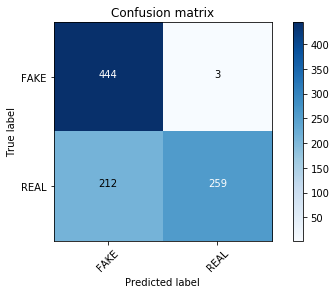

In [19]:
from sklearn.linear_model import  LogisticRegression
logreg=LogisticRegression(C=1e5, max_iter=10000)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of LogisticRegression  classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        Fake       0.68      0.99      0.81       447
        Real       0.99      0.55      0.71       471

    accuracy                           0.77       918
   macro avg       0.83      0.77      0.76       918
weighted avg       0.84      0.77      0.75       918



In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore1=cross_val_score(logreg,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(logreg,x,np.ravel(y),cv=5)
cvscore1,cvscore1.mean()

In [ ]:
print('accuracy of Logistic Regression with cv:'+str(cvscore1.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

In [21]:
from sklearn.svm import LinearSVC
svmmodel_w2v= LinearSVC(C=0.01, multi_class='ovr', max_iter=10000, 
                        class_weight='balanced',penalty='l2' ) 

Accuracy of support vector machine   classifier on training set: 1.00
Accuracy of support vector machine classifier on test set: 0.77
accuracy:   0.749
Confusion matrix, without normalization


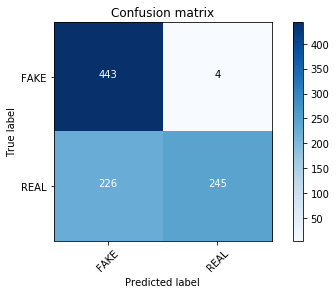

In [22]:
svmmodel_w2v=svmmodel_w2v.fit(X_train, y_train)
pred = svmmodel_w2v.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of support vector machine   classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of support vector machine classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        Fake       0.66      0.99      0.79       447
        Real       0.98      0.52      0.68       471

    accuracy                           0.75       918
   macro avg       0.82      0.76      0.74       918
weighted avg       0.83      0.75      0.74       918



In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore2=cross_val_score(svmmodel_w2v,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(svmmodel_w2v,x,np.ravel(y),cv=5)
cvscore2,cvscore2.mean()

In [ ]:
print('accuracy of support vector machine:'+str(cvscore2.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

Accuracy of RandomForest  classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.80
accuracy:   0.795
Confusion matrix, without normalization


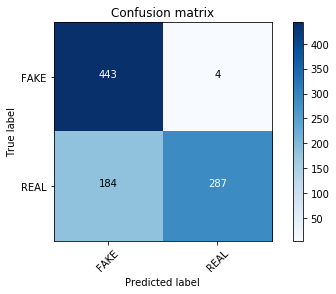

In [24]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=400, n_jobs=4)
Random.fit(X_train, y_train)
pred = Random.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of RandomForest  classifier on training set: {:.2f}'
     .format(Random.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(Random.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        Fake       0.71      0.99      0.82       447
        Real       0.99      0.61      0.75       471

    accuracy                           0.80       918
   macro avg       0.85      0.80      0.79       918
weighted avg       0.85      0.80      0.79       918



In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore3=cross_val_score(Random,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(Random,x,np.ravel(y),cv=5)
cvscore3,cvscore3.mean()

In [ ]:
print('accuracy of Random Forest with cv:'+str(cvscore3.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))